In [9]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [27]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data()

In [28]:
# Delete the racist column `B`
x_train = np.delete(arr=x_train, obj=11, axis=1)
x_test = np.delete(arr=x_test, obj=11, axis=1)

In [29]:
# Find the columns which have to be normalized
for i in range(len(x_train[0])):
    maximum = max(x_train[:,i].max(), x_test[:,i].max())
    minimum = min(x_train[:,i].min(), x_test[:,i].min())
    if minimum < 0.0:
        raise(f'The minimum value for column {i} is {minimum}')
    if maximum > 1.0:
        x_train[:,i] = x_train[:,i] / maximum
        x_test[:,i] = x_test[:,i] / maximum

array([[1.38516817e-02, 0.00000000e+00, 2.93439077e-01, ...,
        4.31786217e-01, 9.54545455e-01, 4.93020806e-01],
       [2.44672171e-04, 8.25000000e-01, 7.31795242e-02, ...,
        4.89451477e-01, 6.68181818e-01, 8.19067685e-02],
       [5.50509013e-02, 0.00000000e+00, 6.52487383e-01, ...,
        9.36708861e-01, 9.18181818e-01, 8.58572557e-02],
       ...,
       [3.89542372e-04, 3.50000000e-01, 2.18457102e-01, ...,
        4.27566807e-01, 7.68181818e-01, 2.06215433e-01],
       [2.41545492e-02, 0.00000000e+00, 7.05839942e-01, ...,
        5.66807314e-01, 6.68181818e-01, 4.15854622e-01],
       [1.61728642e-04, 6.00000000e-01, 1.05623648e-01, ...,
        3.72714487e-01, 7.09090909e-01, 1.15354227e-01]])

In [81]:
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(20)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=['mae'])

# 3. Fit the model
history = model.fit(
    x_train, 
    y_train,
    epochs=500,
    verbose=1,
    callbacks=[tf.keras.callbacks.EarlyStopping(
        monitor='mae',
        patience=10,
        restore_best_weights=True
    )]
)

Epoch 1/500
13/13 [==============================] - 1s 3ms/step - loss: 10.2543 - mae: 10.2543
Epoch 2/500
13/13 [==============================] - 0s 3ms/step - loss: 6.4689 - mae: 6.4689
Epoch 3/500
13/13 [==============================] - 0s 3ms/step - loss: 5.1661 - mae: 5.1661
Epoch 4/500
13/13 [==============================] - 0s 3ms/step - loss: 4.3913 - mae: 4.3913
Epoch 5/500
13/13 [==============================] - 0s 3ms/step - loss: 4.5381 - mae: 4.5381
Epoch 6/500
13/13 [==============================] - 0s 3ms/step - loss: 4.2313 - mae: 4.2313
Epoch 7/500
13/13 [==============================] - 0s 3ms/step - loss: 4.0798 - mae: 4.0798
Epoch 8/500
13/13 [==============================] - 0s 4ms/step - loss: 4.1703 - mae: 4.1703
Epoch 9/500
13/13 [==============================] - 0s 4ms/step - loss: 4.0300 - mae: 4.0300
Epoch 10/500
13/13 [==============================] - 0s 3ms/step - loss: 4.1243 - mae: 4.1243
Epoch 11/500
13/13 [==============================] - 0s 

In [82]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 3.7383 - mae: 3.7383


[3.738337993621826, 3.738337993621826]

Text(0.5, 0, 'Epochs')

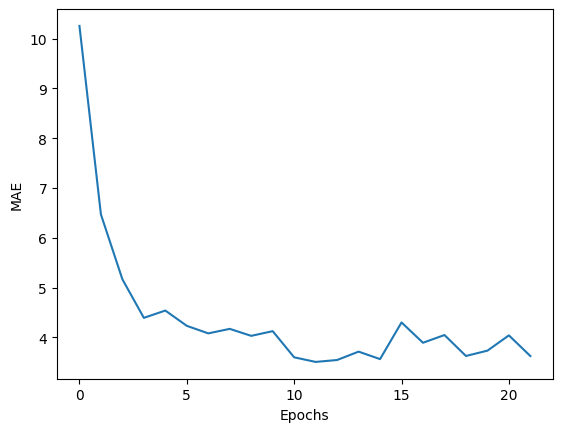

In [83]:
plt.plot(history.history['mae'])
plt.ylabel('MAE')
plt.xlabel('Epochs')